# Weather Data - Exploratory Data Analysis
## Data Science - CS 334
--------------------------------------------

- In this part of the assignment we will perform some investigations to discover the hidden patterns/trends, verify assumptions with the help of statistics and graphical representations in the data.
- Use the cleaned `weather_data` file to do this part.

### Importing Libraries
---------------------------

In [84]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import seaborn as sns
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import normaltest 
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import sys

In [85]:
df = pd.read_pickle('weather_clean.pkl')
print(df.shape)
df.head()

(366, 23)


CloudCover     Events  Max.Dew.PointF  Max.Gust.SpeedMPH  Max.Humidity  \
0         6.0       Rain            46.0               29.0          74.0   
1         7.0  Rain-Snow            40.0               29.0          92.0   
2         8.0       Rain            49.0               38.0         100.0   
3         3.0       None            24.0               33.0          69.0   
4         5.0       Rain            37.0               26.0          85.0   

   Max.Sea.Level.PressureIn  Max.TemperatureF  Max.VisibilityMiles  \
0                     30.45              64.0                 10.0   
1                     30.71              42.0                 10.0   
2                     30.40              51.0                 10.0   
3                     30.56              43.0                 10.0   
4                     30.68              42.0                 10.0   

   Max.Wind.SpeedMPH  Mean.Humidity  Mean.Sea.Level.PressureIn  \
0               22.0           63.0                      30.13   
1               24.0           72.0                      30.59   
2               29.0           79.0                      30.07   
3               25.0           54.0                      30.33   
4               22.0           66.0                      30.59   

   Mean.TemperatureF  Mean.VisibilityMiles  Mean.Wind.SpeedMPH  \
0               52.0                  10.0                13.0   
1               38.0                   8.0                15.0   
2               44.0                   5.0                12.0   
3               37.0                  10.0                12.0   
4               34.0                  10.0                10.0   

   MeanDew.PointF  Min.DewpointF  Min.Humidity  Min.Sea.Level.PressureIn  \
0            40.0           26.0          52.0                     30.01   
1            27.0           17.0          51.0                     30.40   
2            42.0           24.0          57.0                     29.87   
3            21.0           13.0          39.0                     30.09   
4            25.0           12.0          47.0                     30.45   

   Min.TemperatureF  Min.VisibilityMiles  PrecipitationIn  WindDirDegrees  \
0              39.0                 10.0             0.01           268.0   
1              33.0                  2.0             0.10            62.0   
2              37.0                  1.0             0.44           254.0   
3              30.0                 10.0             0.00           292.0   
4              26.0                  5.0             0.11            61.0   

        Date  
0 2014-12-01  
1 2014-12-02  
2 2014-12-03  
3 2014-12-04  
4 2014-12-05

You can see the statistics for all the columns using the `describe` function in pandas.

In [86]:
df.describe(include='all')

CloudCover Events  Max.Dew.PointF  Max.Gust.SpeedMPH  Max.Humidity  \
count   366.000000    366      366.000000         366.000000    366.000000   
unique         NaN     12             NaN                NaN           NaN   
top            NaN   None             NaN                NaN           NaN   
freq           NaN    201             NaN                NaN           NaN   
first          NaN    NaN             NaN                NaN           NaN   
last           NaN    NaN             NaN                NaN           NaN   
mean      4.707650    NaN       45.475410          26.241803     83.188525   
std       2.373206    NaN       18.317241           6.734872     14.251555   
min       0.000000    NaN       -6.000000          10.000000     39.000000   
25%       3.000000    NaN       32.000000          21.000000     73.250000   
50%       5.000000    NaN       47.500000          25.500000     86.000000   
75%       7.000000    NaN       61.000000          30.000000     93.000000   
max       8.000000    NaN       75.000000          45.000000    100.000000   

        Max.Sea.Level.PressureIn  Max.TemperatureF  Max.VisibilityMiles  \
count                 366.000000        366.000000           366.000000   
unique                       NaN               NaN                  NaN   
top                          NaN               NaN                  NaN   
freq                         NaN               NaN                  NaN   
first                        NaN               NaN                  NaN   
last                         NaN               NaN                  NaN   
mean                   30.155328         58.931694             9.907104   
std                     0.232095         20.047156             0.707768   
min                    29.580000         18.000000             2.000000   
25%                    30.000000         42.000000            10.000000   
50%                    30.140000         60.000000            10.000000   
75%                    30.310000         76.000000            10.000000   
max                    30.880000         96.000000            10.000000   

        Max.Wind.SpeedMPH  Mean.Humidity  Mean.Sea.Level.PressureIn  \
count          366.000000     366.000000                 366.000000   
unique                NaN            NaN                        NaN   
top                   NaN            NaN                        NaN   
freq                  NaN            NaN                        NaN   
first                 NaN            NaN                        NaN   
last                  NaN            NaN                        NaN   
mean            20.620219      66.021858                  30.038251   
std              5.762945      14.433392                   0.235583   
min              8.000000      28.000000                  29.490000   
25%             16.000000      56.000000                  29.870000   
50%             20.000000      66.000000                  30.030000   
75%             24.000000      76.750000                  30.190000   
max             38.000000      98.000000                  30.770000   

        Mean.TemperatureF  Mean.VisibilityMiles  Mean.Wind.SpeedMPH  \
count          366.000000            366.000000          366.000000   
unique                NaN                   NaN                 NaN   
top                   NaN                   NaN                 NaN   
freq                  NaN                   NaN                 NaN   
first                 NaN                   NaN                 NaN   
last                  NaN                   NaN                 NaN   
mean            51.404372              8.887597           10.680328   
std             19.156754              2.000271            3.491515   
min              8.000000              1.000000            4.000000   
25%             36.250000              8.000000            8.000000   
50%             53.500000             10.000000           10.000000   
75%             6

## Distributions + Correlation
------------------------------------

#### Use plots to support your findings.
- The world of Data Science revolves around the probability distributions and the core of probability distribution is focused on Normal distributions.This is from where we draw our assumptions about a feature/variable and make hypothesis. So which variables are normally distributed in this data? Do you see any variables which shows bi-modal distribution? Tri-modal?
- In reality, data is not always spread consistently. One of the reasons might be that there is not sufficient information available from one group of data. Another reason might be that if data is collected through forms/devices then some people might choose to not enter the data or the device might be faulty. Hence, we need to know whether there is any feature in the data which is skewed. Are there any variables which are skewed? If yes then plot those.
- Is Gust Speed effected by any other variable in the data? If yes, then which column/columns? 
- Show the relatioship between all the variables. Explain these relations. (Linear, positive, negative, not-related,etc)
- How can we detect multicollinearity? Which plot can be used? Which variables fall under this? [Click here to read up on `multi-collinearity`](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf) since we haven't covered this in class. Google is your friend so use it!

# Checking for variables that are normally distributed

I will use D’Agostino’s K^2 test to check for normality. It calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.

Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

In [87]:
arr = []  
exclude = ['Events' , 'Date']
gauss = 0 
not_gauss = 0

for col in df.columns:
    if col in exclude:
        continue
    for data in df[col]:
        arr.append(data)
    stat, p = normaltest(arr)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # The p-value is interpreted against an alpha of 5%
    
    alpha = 0.05
    if p > alpha:
        print(col, 'looks Gaussian (fail to reject H0)')
        gauss = gauss + 1
    else:
        print(col, 'does not look Gaussian (reject H0)')
        not_gauss = not_gauss + 1
    print('')
    arr.clear()

print ('Total variables that are normally distributed :  ' , gauss)
print ('Total variables that are not normally distributed :  ' , not_gauss)

Statistics=168.145, p=0.000
CloudCover does not look Gaussian (reject H0)

Statistics=24.950, p=0.000
Max.Dew.PointF does not look Gaussian (reject H0)

Statistics=14.006, p=0.001
Max.Gust.SpeedMPH does not look Gaussian (reject H0)

Statistics=27.240, p=0.000
Max.Humidity does not look Gaussian (reject H0)

Statistics=6.666, p=0.036
Max.Sea.Level.PressureIn does not look Gaussian (reject H0)

Statistics=100.218, p=0.000
Max.TemperatureF does not look Gaussian (reject H0)

Statistics=561.576, p=0.000
Max.VisibilityMiles does not look Gaussian (reject H0)

Statistics=30.233, p=0.000
Max.Wind.SpeedMPH does not look Gaussian (reject H0)

Statistics=4.907, p=0.086
Mean.Humidity looks Gaussian (fail to reject H0)

Statistics=3.685, p=0.158
Mean.Sea.Level.PressureIn looks Gaussian (fail to reject H0)

Statistics=72.587, p=0.000
Mean.TemperatureF does not look Gaussian (reject H0)

Statistics=146.101, p=0.000
Mean.VisibilityMiles does not look Gaussian (reject H0)

Statistics=39.029, p=0.000


# Visualising BiModal and TriModal variables

Histogram plots of all the variables are plotted below to determine whether any variable is BiModal/TriModal distributed.

- BiModal-Distributions:
CloudCover, Max.TemperatureF, Max.Wind.SpeedMPH, Min.Sea.Level.PressureIn, Min.TemperatureF, Min.VisibilityMiles,
WindDirDegrees

- TriModal-Distributions: None

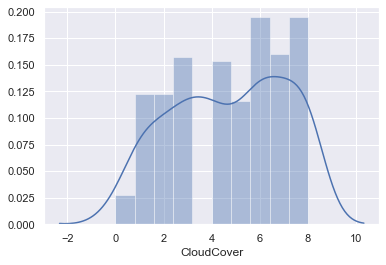

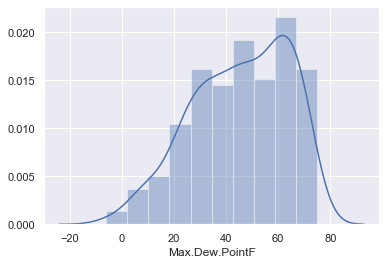

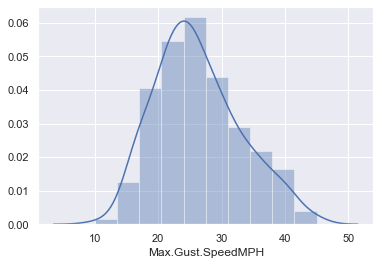

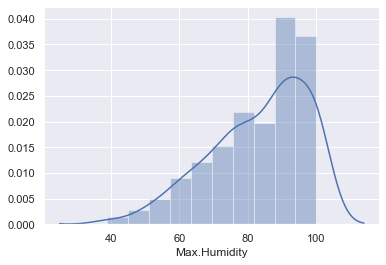

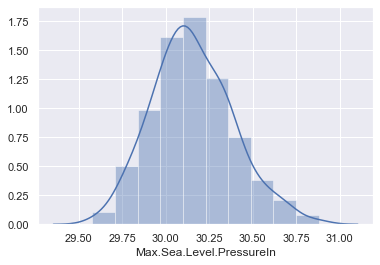

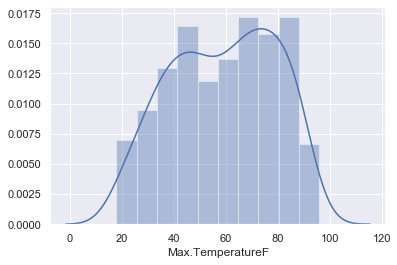

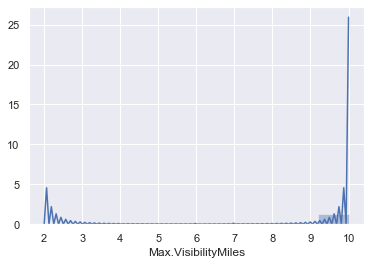

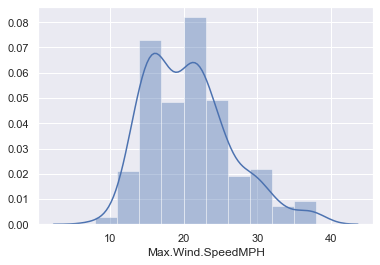

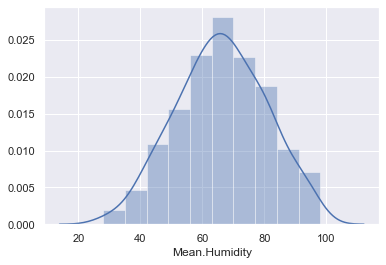

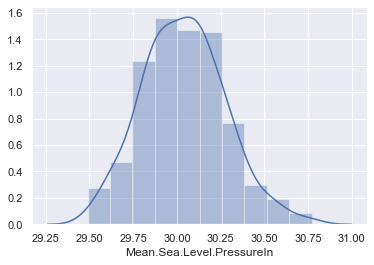

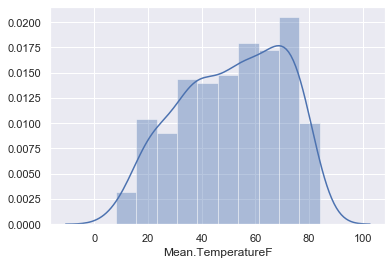

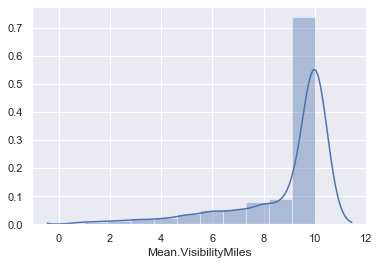

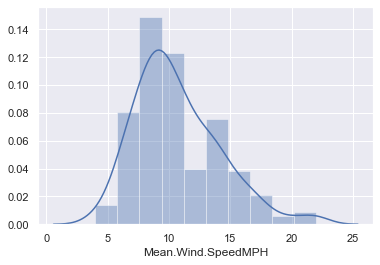

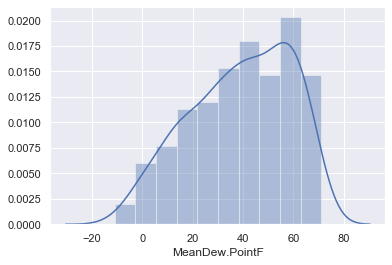

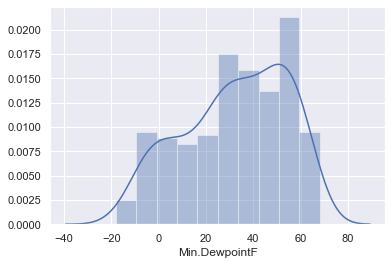

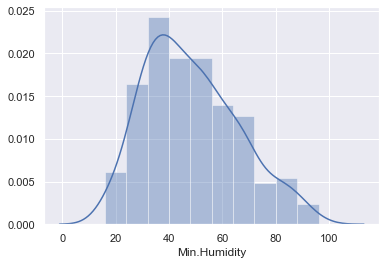

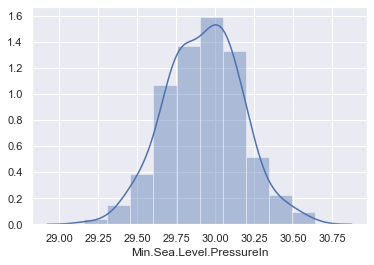

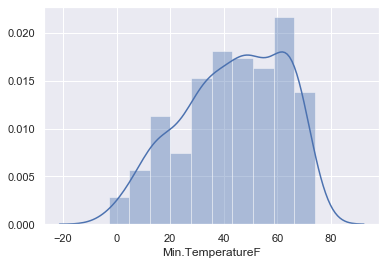

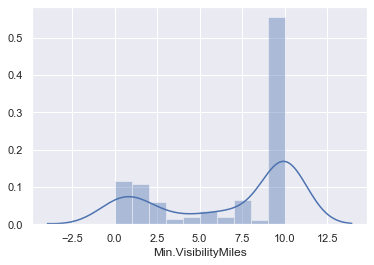

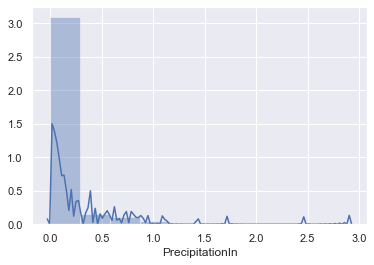

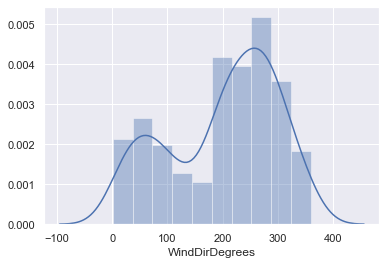

<Figure size 432x288 with 0 Axes>

In [88]:

exclude = ['Events' , 'Date']

for col in df.columns:
    if col in exclude:
        continue
    sns.distplot(df[col], kde=True, bins=10, rug=False)
    plt.figure()


# Testing for skewness

- For testing skewness I used Pandas builtin function dataframe.skew() and the results are clearly visible below. It should
be noted that the signs of the values corresponds exactly to the histogram plots made above. Negative indicates data is
negatively skewed or left skewed and positive indicates it is positively skewed or right skewed.

- Also normal distributions are not skewed. They are perfectly bell-shaped/symmetrical. 

- Hence, apart from Min.Sea.Level.PressureIn, Mean.Sea.Level.PressureIn, and Mean.Humidity every other variable is
either positively skewed or negatively skewed.

In [89]:
df.skew(axis = 0, skipna = True) 

CloudCover                  -0.186499
Max.Dew.PointF              -0.436778
Max.Gust.SpeedMPH            0.481674
Max.Humidity                -0.719748
Max.Sea.Level.PressureIn     0.330029
Max.TemperatureF            -0.162292
Max.VisibilityMiles         -8.350676
Max.Wind.SpeedMPH            0.750892
Mean.Humidity               -0.070048
Mean.Sea.Level.PressureIn    0.243722
Mean.TemperatureF           -0.270501
Mean.VisibilityMiles        -1.975761
Mean.Wind.SpeedMPH           0.829347
MeanDew.PointF              -0.382789
Min.DewpointF               -0.368243
Min.Humidity                 0.496616
Min.Sea.Level.PressureIn    -0.007247
Min.TemperatureF            -0.377408
Min.VisibilityMiles         -0.650277
PrecipitationIn              5.288869
WindDirDegrees              -0.475575
dtype: float64

# Is Gust Speed effected by any other variable in the data? 

Scatter plots below show the correllation between 'Gust Speed' and other variables. Regression lines have been added to each
plot to make visualization more easier.

- Positive correlation with : 'Max.Wind.SpeedMPH' , 'Mean.Wind.SpeedMPH'

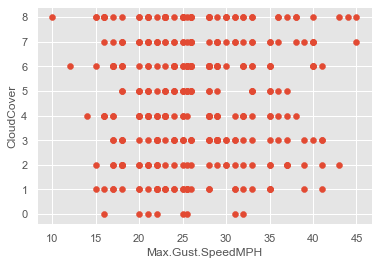

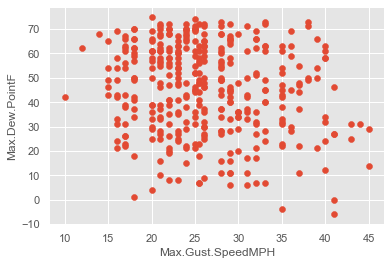

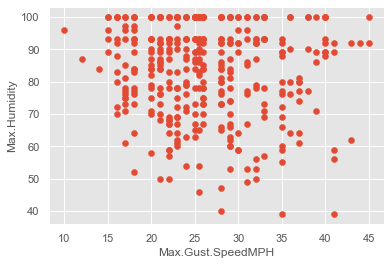

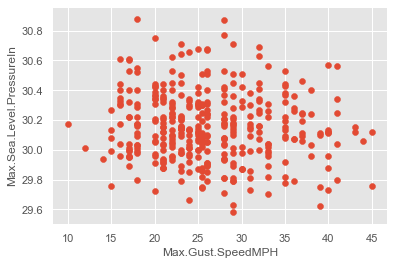

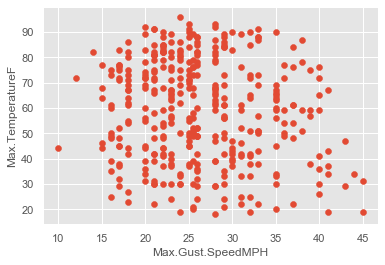

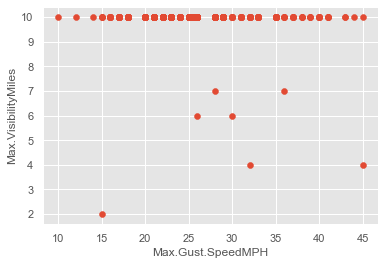

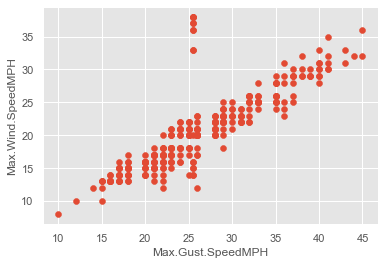

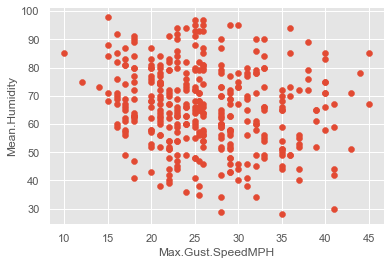

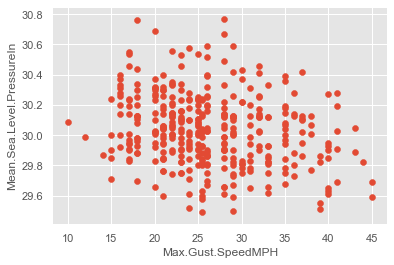

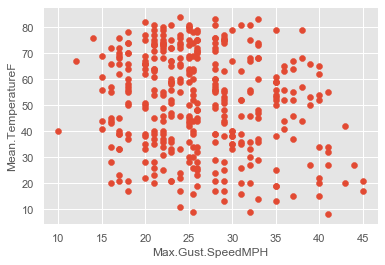

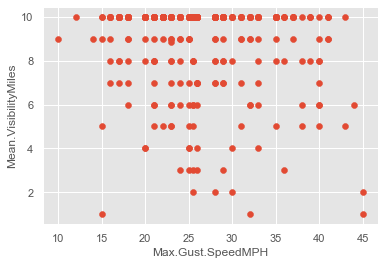

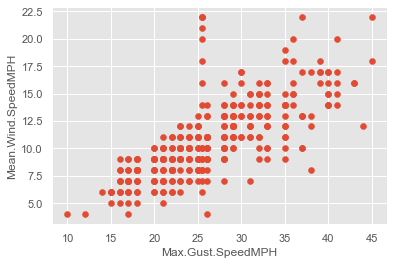

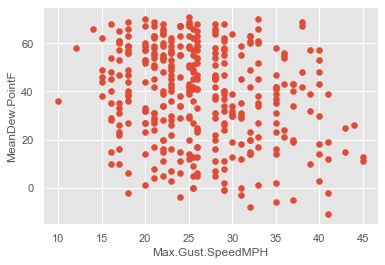

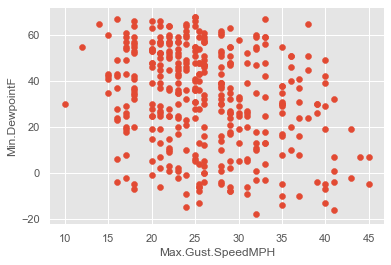

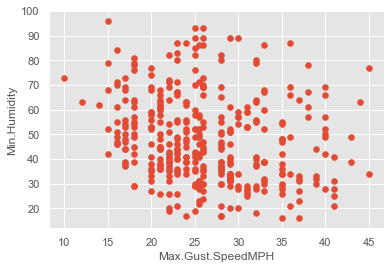

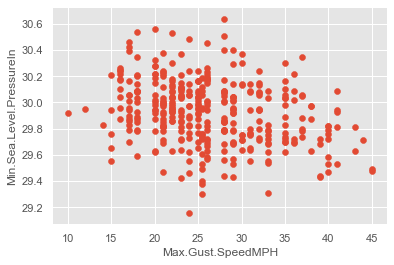

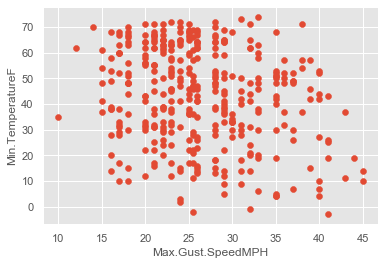

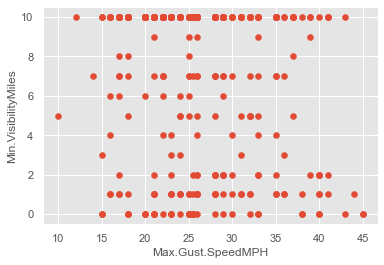

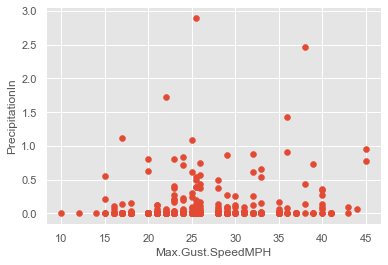

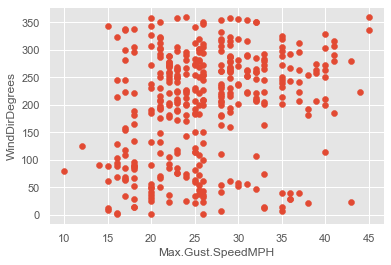

<Figure size 432x288 with 0 Axes>

In [90]:
exclude2 = ['Events' , 'Date' , 'Max.Gust.SpeedMPH']
gust = []
other = []

for data in df['Max.Gust.SpeedMPH']:
    gust.append(data)
           
for col in df.columns:
    if col in exclude2:
        continue
    for data in df[col]:
        other.append(data)
    np.corrcoef(gust, other)
    matplotlib.style.use('ggplot')
    plt.scatter(gust, other)
    plt.xlabel('Max.Gust.SpeedMPH')
    plt.ylabel(col)
    plt.show()
    plt.figure()
    other.clear()

# Relatioship between all the variables

- The plot below illustrates relationship between all the variables. When there is no correlation between 2 features the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation. Hence linear, negative, positive relationships are clearly visible between features.

- When evaluating the correlation between all the variables, the correlation of each feature with itself is also included, which is always 1, so that is why the graph always has the red diagonal from the upper left to the lower right.

- Other than the diagonal, the rest of the squares show correlation between different variables and color schemes make it really easy to visualize the relationship each variable has with the other.

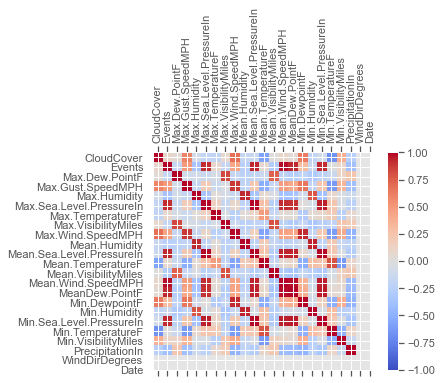

In [91]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

# Multicollinearity

- Multicollinearity occurs when independent variables in a regression model are correlated. Very high standard errors for regression coefficients means multicollinearity is present. Another method of detection is to look at the coefficient score.
Variance Inflation Factor- VIF can also be used to determine if two independent variables are collinear with each other.

- Scatter-plots and correlation matrices can be used to check for multicollinearity.

<Figure size 432x288 with 0 Axes>

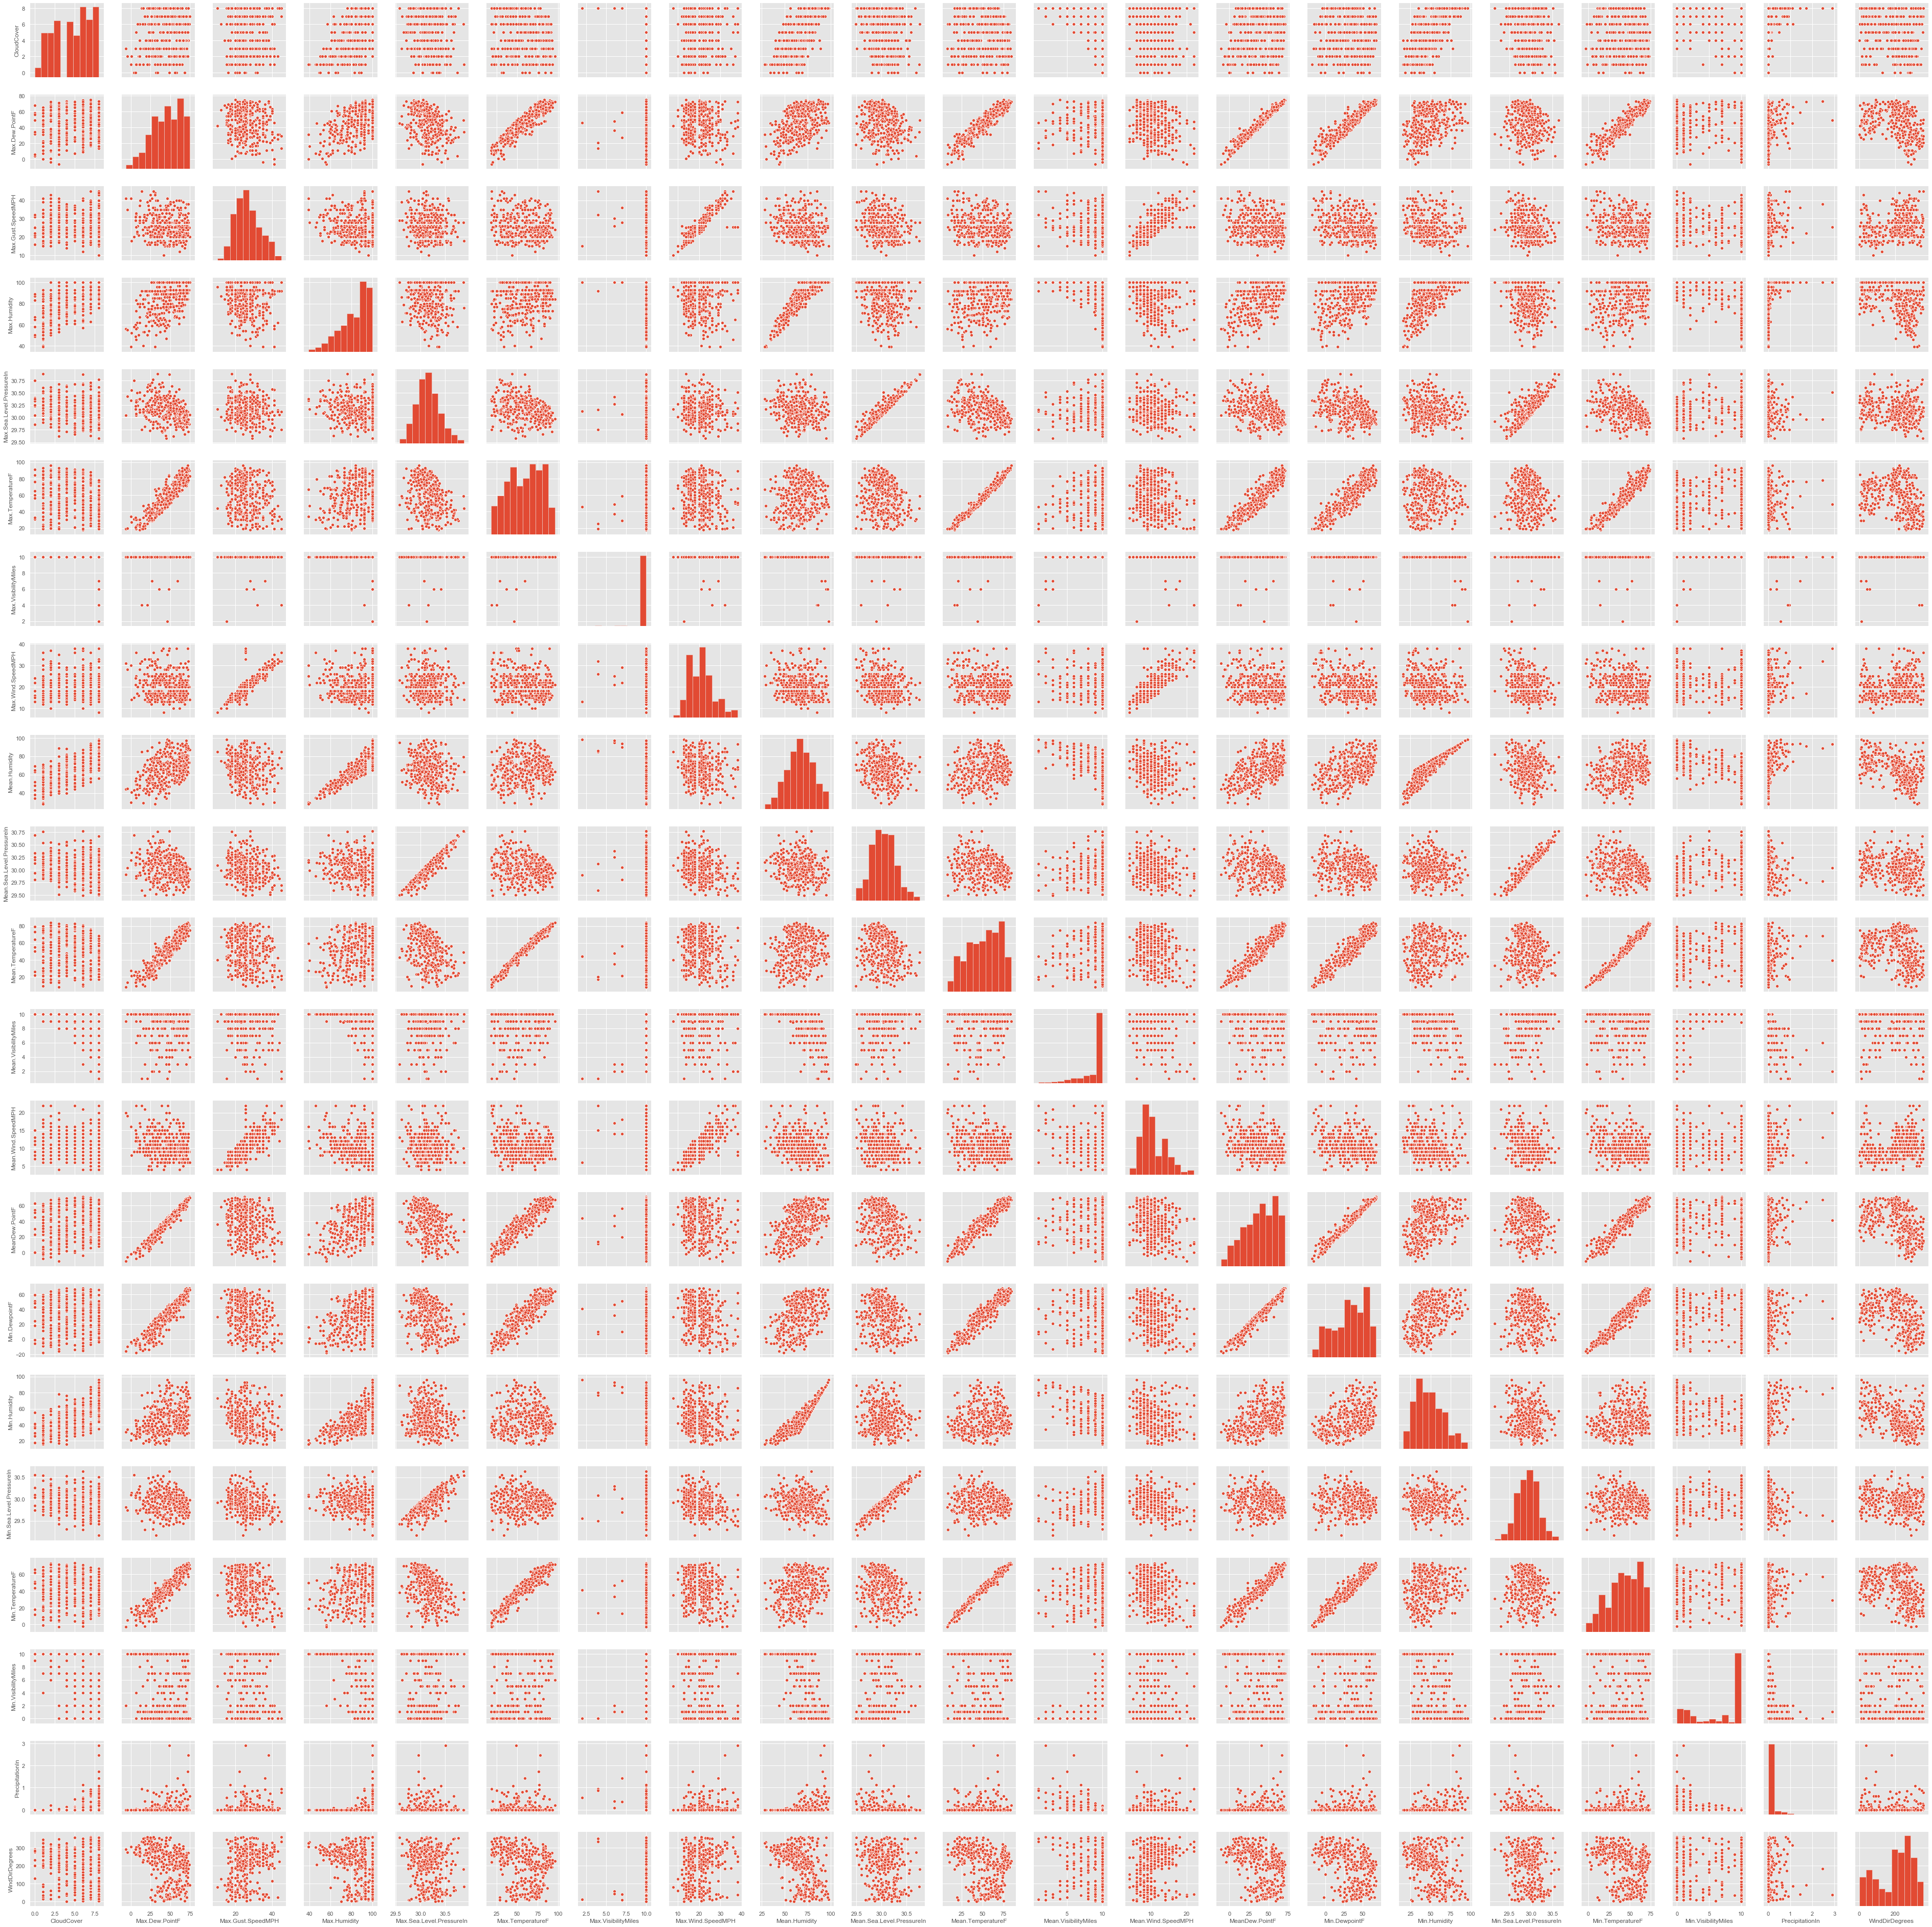

<Figure size 432x288 with 0 Axes>

In [92]:
sns.pairplot(df)
plt.figure()

# Hence variables that are multi-collinear are showing a linear relationship with more than one feature in the pair plot below.

## General Observations
----------------------------
#### Use plots to support your findings.
- Which events are the most common?

# Most common events

None                          201
Rain                           90
Snow                           31
Rain-Snow                      10
Fog-Rain                        8
Fog-Snow                        7
Fog                             6
Rain-Thunderstorm               4
Fog-Rain-Snow                   4
Fog-Rain-Thunderstorm           3
Thunderstorm                    1
Fog-Rain-Hail-Thunderstorm      1
Name: Events, dtype: int64




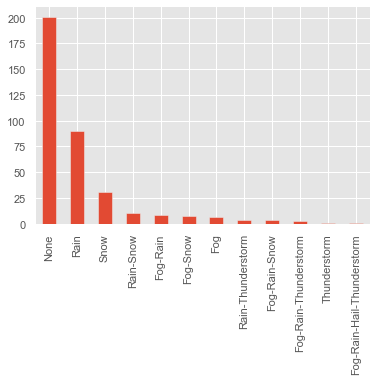

In [93]:
print(df['Events'].value_counts())
print('')
print('')
df['Events'].value_counts().plot(kind='bar')

# Hence most of the days nothing happened.
# Rain was most frequent followed by snow and Rain-Snow

## Time Plots
------------

In [94]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2015-12-01 00:00:00'))

So the time period of the data is a whole year from December 2014 to December 2015. 

### Temprature all around the year
#### Use plots to support your findings.

-  We want to figure out the hottest and coldest months of the year and also identify the seasons as well. Time plots will help us to answer these questions.
- How does the temprature vary between the months? Draw a plot and explain the trend. Also show the mean and median value of temprature on the plot as well. `Hint:` Using Horizontal lines
- Now we want to show how much the temprature varies on the same plot. Hint: See the matplotlib or documentation to calculate and plot the variation of the temprature on the same plot using the standard deviation.
- For each month find the `Mean.TemperatureF` and show the trend using a scatter plot. What can you observe?
- Is there any trend by how the `Mean.TemperatureF` changes with days of a week? Which day is the coldest and which is the hottest according to the data?
- From June to August, show the correlation between `Mean.VisibilityMiles` and `Mean.Humidity` if there is any using a single plot. `Hint:` Use a line plot. Is there anything interesting that you observe?
- Use `rolling mean` to show the change of `Mean.TemperatureF` weekly and monthly all year round. (Weakly rolling mean and Monthly rolling mean.)
- Use a suitable visualization to show counts of different `Events` per month. Which event occured the most and during which month?
- For each month, plot the minimum, maximum and average temprature. Do you see any trends? Draw a comparison between the values for all the months.
- Plot the temperature of hottest and coldest day of every month on same plot.

# Hottest and coldest months of the year

In [95]:
# Adding column 'Seasons' to dataframe

Seasons = []
for data in df['Date']:
    m = data.month
    if m == 12 or m == 1 or m == 2:
        Seasons.append('Winter')
    elif m == 3 or m == 4 or m == 5:
        Seasons.append('Spring')
    elif m == 6 or m == 7 or m == 8:
        Seasons.append('Summer')
    elif m == 9 or m == 10 or m == 11:
        Seasons.append('Autumn')

df['Seasons'] = Seasons


- It can be seen from the line plot that hottest months were July to September. Corresponding seasons were Summer and Autumn
- Coldest months were January to March. Corresponding seasons were Winter and Spring.

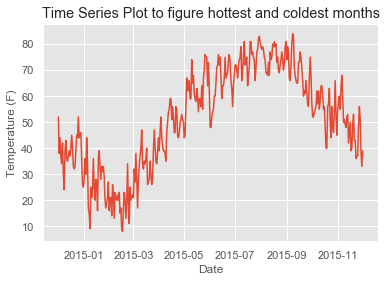

In [96]:
plt.plot(df['Date'] , df['Mean.TemperatureF'])
plt.title('Time Series Plot to figure hottest and coldest months')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# How does the temperature vary between the months? 
# Temperature variation on the same plot

- Trend : Initially temperature decreases from the months of January to March and these are the coldest months. Seasons change from winter to spring. March onwards temperature increases and is on its peak during the month of August (Summer season). As autumn season approaches it gets a bit colder (August onwards) and then it tends to decrease again and reaches its lowest point in December which is again the winter season.

Mean (Gray line):  51.404371584699454
Median :  53.5


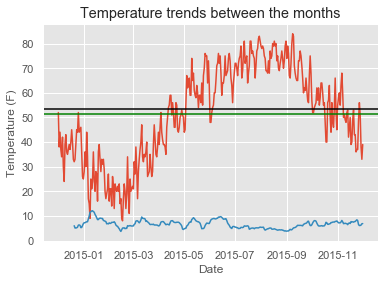

In [97]:
mean = df['Mean.TemperatureF'].mean()
print('Mean (Gray line): ', mean)
median = df['Mean.TemperatureF'].median()
print('Median : ', median)

f = plt.figure()
ax = f.add_subplot(111)


plt.plot(df['Date'] , df['Mean.TemperatureF'])
plt.plot(df['Date'], df['Mean.TemperatureF'].rolling(20).std())
plt.axhline(y=mean, color='Green')
plt.axhline(y=median, color='Black')

plt.title('Temperature trends between the months')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()


# Trends between Mean.TemperatureF for each month

- Observation : Scatter plot shows a non linear relationship. Mean temperature for each month tends to decrease from January to March which are usually the winter and spring seasons. It then increases and is at its peak during the month of August which is the summer season before falling again gradually till the month of December.

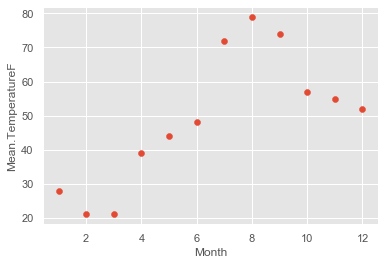

In [98]:
Month = []
t = []

done = []

for i in range(len(df)) : 
    date = df.loc[i, "Date"]
    m = date.month
    if m in done:
        continue
    done.append(m)
    temp = df.loc[i, "Mean.TemperatureF"]
    Month.append(m)
    t.append(temp)


    
matplotlib.style.use('ggplot')
plt.scatter(Month, t)
plt.xlabel('Month')
plt.ylabel('Mean.TemperatureF')
plt.show()

# Changes in Mean.TemperatureF with days of a week

- Observation : Plot shows a non-linear relationship.
- Coldest day : Monday
- Hottest day : Tuesday

In [99]:
# Adding column 'Days' to dataframe

df['Days'] = df['Date'].dt.weekday_name

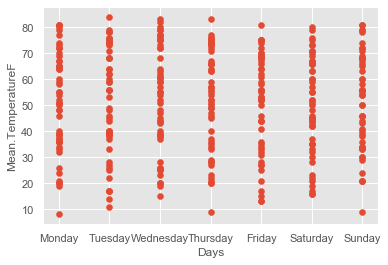

In [100]:
matplotlib.style.use('ggplot')
plt.scatter(df['Days'], df['Mean.TemperatureF'])
plt.xlabel('Days')
plt.ylabel('Mean.TemperatureF')
plt.show()

# Corellation between Mean.VisibilityMiles and Mean.Humidity from June to August

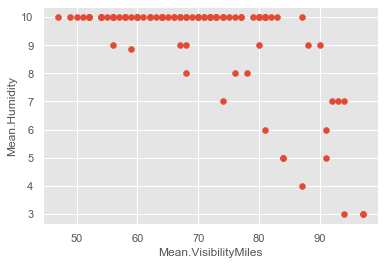

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [101]:
visibility = []
humidity = []

for i in range(len(df)) : 
    date = df.loc[i, "Date"]
    m = date.month
    if m == 6 or m == 7 or m == 8:
        v = df.loc[i, "Mean.VisibilityMiles"]
        visibility.append(v)
    else:
        continue

for i in range(len(df)) : 
    date = df.loc[i, "Date"]
    m = date.month
    if m == 6 or m == 7 or m == 8:
        h = df.loc[i, "Mean.Humidity"]
        humidity.append(h)
    else:
        continue
        
np.corrcoef(visibility, humidity)
matplotlib.style.use('ggplot')
plt.scatter(humidity, visibility)
plt.xlabel('Mean.VisibilityMiles')
plt.ylabel('Mean.Humidity')
plt.show()
plt.figure()

# Mean.VisibilityMiles increases as Mean.Humidity decreases

# Rolling mean to show change of Mean.TemperatureF weekly and monthly all year round

In [102]:
# Adding 'Week' column

w = [] # week
for data in df['Date']:
    week = data.week
    w.append(week)
    
df['Week'] = w
df2 = df.sort_values(by = 'Week')

# Adding 'Month' column

month = []
month2 = []
for data in df['Date']:
    m = data.month
    month2.append(m)
    if m == 1:
        month.append('January')
    elif m == 2:
        month.append('February')
    elif m == 3:
        month.append('March')
    elif m == 4:
        month.append('April')
    elif m == 5:
        month.append('May')
    elif m == 6:
        month.append('June')
    elif m == 7:
        month.append('July')
    elif m == 8:
        month.append('August')
    elif m == 9:
        month.append('September')
    elif m == 10:
        month.append('October')
    elif m == 11:
        month.append('November')
    elif m == 12:
        month.append('December')
        
df['Month'] = month
df['Month2'] = month2
df3 = df.sort_values(by = 'Month2')

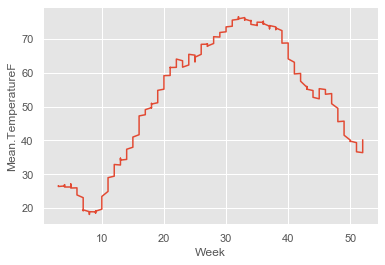

In [103]:
plt.plot(df2['Week'], df2['Mean.TemperatureF'].rolling(20).mean(), label = 'line 1')
plt.xlabel('Week')
plt.ylabel('Mean.TemperatureF')
plt.show()

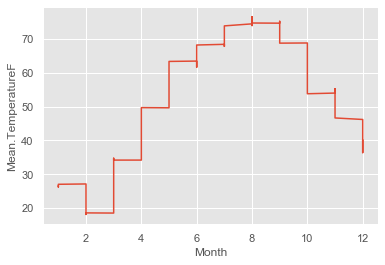

In [104]:
plt.plot(df3['Month2'], df2['Mean.TemperatureF'].rolling(20).mean(), label = 'line 2')
plt.xlabel('Month')
plt.ylabel('Mean.TemperatureF')
plt.show()

# Counts of different Events per month

In [105]:
temp_month = []
for data in df['Date']:
    temp_month.append(data.month)
df['tempMonth'] = temp_month
temp = df.groupby(['tempMonth', 'Events']).size().unstack(fill_value=1)
temp

Events     Fog  Fog-Rain  Fog-Rain-Hail-Thunderstorm  Fog-Rain-Snow  \
tempMonth                                                             
1            1         1                           1              1   
2            1         1                           1              1   
3            1         3                           1              2   
4            1         1                           1              1   
5            2         1                           1              1   
6            1         1                           1              1   
7            1         1                           1              1   
8            2         1                           1              1   
9            1         2                           1              1   
10           1         1                           1              1   
11           1         1                           1              1   
12           1         1                           1              1   

Events     Fog-Rain-Thunderstorm  Fog-Snow  None  Rain  Rain-Snow  \
tempMonth                                                           
1                              1         3    15     2          1   
2                              1         4     8     1          2   
3                              1         1    13     4          4   
4                              2         1    16    10          1   
5                              1         1    22     7          1   
6                              1         1    17    12          1   
7                              1         1    18    12          1   
8                              1         1    20     4          1   
9                              1         1    22     5          1   
10                             1         1    20     9          1   
11                             1         1    20    10          1   
12                             1         1    10    15          2   

Events     Rain-Thunderstorm  Snow  Thunderstorm  
tempMonth                                         
1                          1     8             1  
2                          1    13             1  
3                          1     5             1  
4                          1     1             1  
5                          1     1             1  
6                          1     1             1  
7                          1     1             1  
8                          2     1             1  
9                          1     1             1  
10                         1     1             1  
11                         1     1             1  
12                         1     4             1

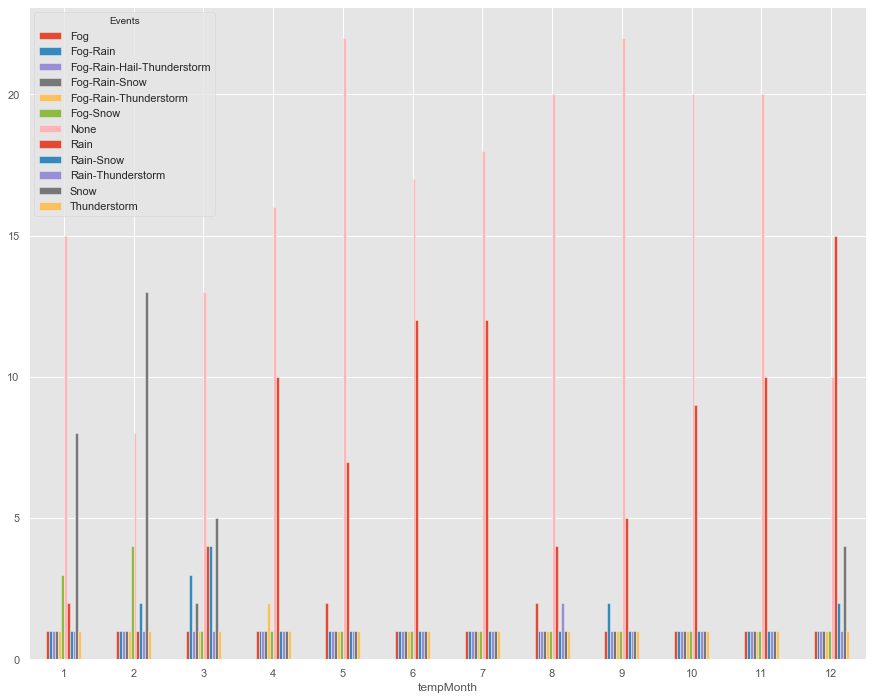

In [106]:
temp.plot.bar(rot = 0 , figsize = (15,12))
del df['tempMonth']

# Hence Rain occured the most during December

# Minimum, maximum, and average temperature for each month

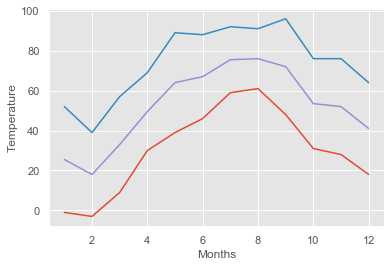

In [107]:
temp_df = (df.sort_values(by = 'Month2')).groupby(['Month2'])
min_temp = []
max_temp = []
avg_temp = []
total = 1
month = []

for data in temp_df:
    minimum = data[1]['Min.TemperatureF'].min()
    min_temp.append(minimum)
    
    maximum = data[1]['Max.TemperatureF'].max()
    max_temp.append(maximum)
    
    month.append(total)
    
    average = (minimum + maximum)/2.0
    avg_temp.append(average)
    
    total = total + 1
    
plt.plot(month, min_temp, label = 'line 1')
plt.plot(month, max_temp, label = 'line 2')
plt.plot(month, avg_temp, label = 'line 3')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

# Plot the temperature of hottest and coldest day of every month on same plot

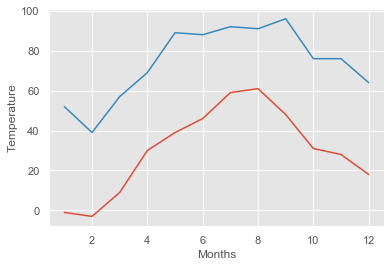

In [108]:
temp_df = (df.sort_values(by = 'Month2')).groupby(['Month2'])
min_temp = []
max_temp = []
avg_temp = []
total = 1
month = []

for data in temp_df:
    minimum = data[1]['Min.TemperatureF'].min()
    min_temp.append(minimum)
    
    maximum = data[1]['Max.TemperatureF'].max()
    max_temp.append(maximum)
    
    month.append(total)
    
    average = (minimum + maximum)/2.0
    avg_temp.append(average)
    
    total = total + 1
    
plt.plot(month, min_temp, label = 'line 1')
plt.plot(month, max_temp, label = 'line 2')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()